In [1]:
# append parent to path to allow imports
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [2]:
from pathlib import Path
import cv2
import numpy as np

from src.face import FaceDetector
from src.mask import MaskHandler
from src.utils.project_utils import Utils
from src.superpixels import SuperpixelExtractor
from src.feature import Feature, FeatureExtractor, FeatureDivergence

In [3]:
fd = FaceDetector("../assets/lbfmodel.yaml")
mh = MaskHandler()

IMAGE_PATH = Path("test_images/face.jpg")

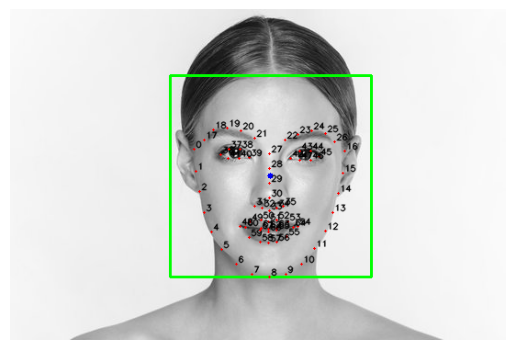

In [4]:
img_rgb, _, _, landmarks_all_faces = fd.detect(IMAGE_PATH, display_indices=True)
Utils.display(img_rgb)

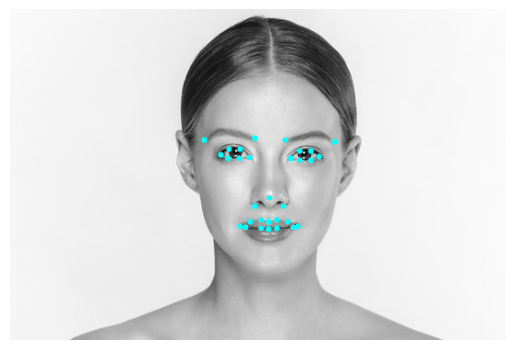

1


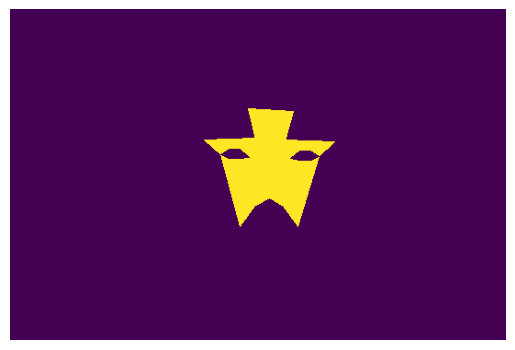

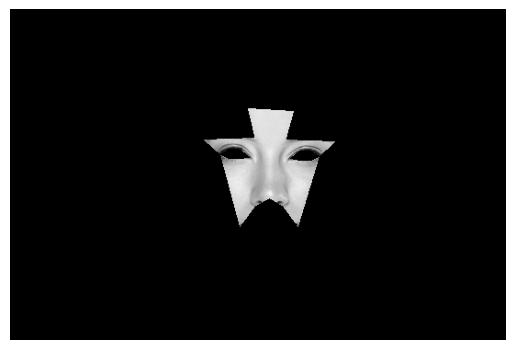

In [5]:
masked_img, selected_pts = mh.get_mask_points(IMAGE_PATH, landmarks_all_faces)
Utils.display(masked_img)

masks, masked_imgs = mh.build_masks(IMAGE_PATH, selected_pts, landmarks_all_faces)
print(len(masks))
Utils.display(masks[0])
Utils.display(masked_imgs[0])

1


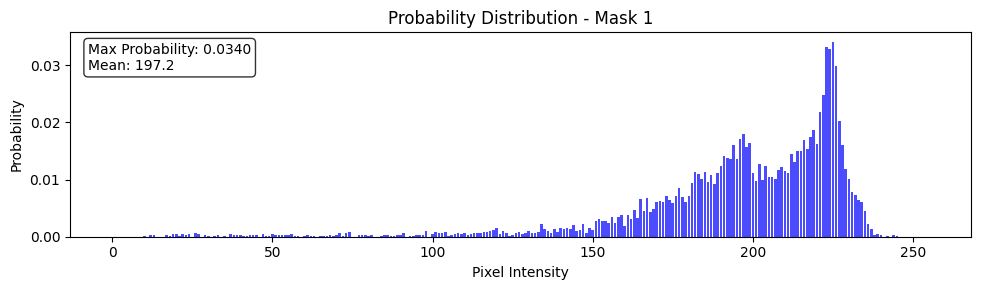

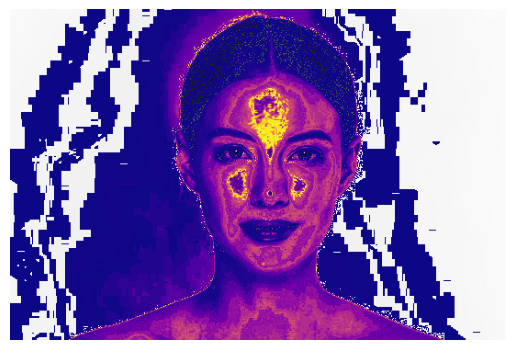

In [6]:
intensity_histograms = mh.get_intensity_histograms(IMAGE_PATH, masks)

print(len(intensity_histograms))
Utils.visualize_histograms(intensity_histograms)
Utils.apply_intensity_probability_map(IMAGE_PATH, intensity_histograms[0])

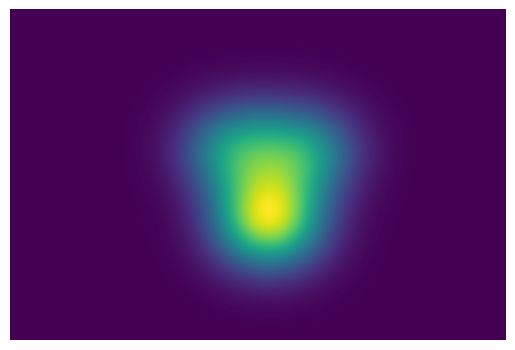

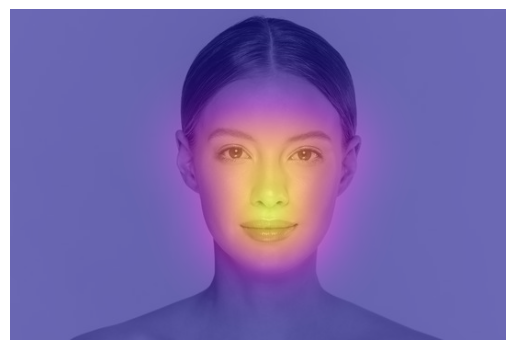

In [7]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(
    IMAGE_PATH, selected_pts
)

idx = 0
Utils.display(prior_face_masks[idx])
Utils.display(heatmaps_blended[idx])

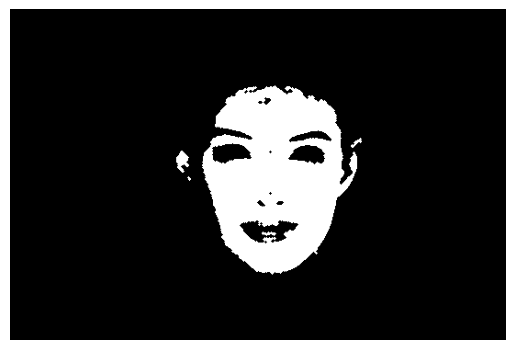

255 0


In [8]:
alpha = 0.9
lambda_ = 0.0018
skin_pixel_maps = mh.get_skin_pixel_maps(
    IMAGE_PATH,
    intensity_histograms,
    prior_face_masks,
    alpha,
    lambda_,
    selected_pts,
    True,
)

skin_pixel_maps = [Utils.morphological_cleanup(s) for s in skin_pixel_maps]

idx = 0
Utils.display(skin_pixel_maps[idx], cmap="gray")
print(skin_pixel_maps[idx].max(), skin_pixel_maps[idx].min())

In [9]:
spe = SuperpixelExtractor()
slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

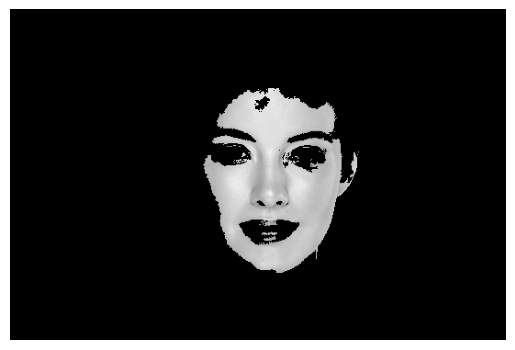

In [10]:
mask_labels = spe.get_mask_labels(slic, skin_pixel_maps[0], 0.9)
Utils.display_selected_superpixels(IMAGE_PATH, slic.getLabels(), mask_labels)

In [11]:
fe = FeatureExtractor()

feature_vectors_sp = fe.extract_all_features_superpixels(IMAGE_PATH, slic)
print(feature_vectors_sp)

c:\Users\jiakh\Desktop\skin_detection\src\feature.py:270: UserWarning: Possible precision loss converting image of type uint32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  basic_features = self.extract_basic_features_superpixels(
c:\Users\jiakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting uint32 to uint8 without scaling because max value 253 fits in uint8
  return _convert(image, np.uint8, force_copy)


[Feature(label=0, mean_intensity=np.float64(249.19834710743802), std_intensity=np.float64(0.39875497791123365), entropy=np.float64(0.3388823317671177), lacunarity_vector=array([1.        , 1.        , 1.        , 1.        , 0.92561983,
       1.        , 1.        , 1.        , 0.99173554, 1.        ,
       1.        , 0.92561983, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97520661, 1.        , 0.98347107, 1.        ,
       1.        , 0.90082645, 1.        , 1.        , 0.98347107,
       0.98347107, 1.        , 1.        , 0.90082645, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97520661,
       1.        , 1.        , 1.        , 0.97520661])), Feature(label=1, mean_intensity=np.float64(249.0), std_intensity=np.float64(0.0), entropy=np.float64(0.05354938088195042), lacunarity_vector=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1

In [12]:
len(feature_vectors_sp)

1944